# Ejemplo 01:
Estas son las librerías que utilizaremos.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Primero, generaremos un conjunto de blobs. Estos datos son "dummy" y nos ayudarán a entrenar casi cualquier sistema. Si tienes datos propios, puedes usarlos en lugar de los blobs.

Ahora mismo no nos interesa de dónde vienen los datos, por lo que los Blobs nos funcionarán bien.

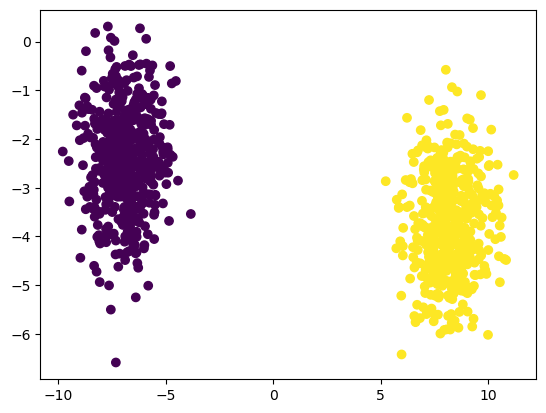

In [3]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

Después, crearemos una función que haga la partición en 3 secciones. Usaremos 0.60 (60% para entrenamiento), 0.10 (10 % para validación) y 0.30 (30% para pruebas).

Nota que sólo será util si necesitas tres particiones (entrenamiento, validación y prueba). Si no necesitas tres, mejor utiliza la función train_test_split. 

In [20]:
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    print(temp_size)
    print("Tamaño del temp_size: {}".format(temp_size))
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.60,0.10,0.30)
print("Forma del train: {}\nForma de validación: {}\nForma de prueba: {}".format(x_train.shape,x_val.shape, x_test.shape))
# print(x_train.shape)
# print(x_val.shape)
# print(x_test.shape)


0.4
Tamaño del temp_size: 0.4
Forma del train: (600, 2)
Forma de validación: (100, 2)
Forma de prueba: (300, 2)


In [11]:
df = pd.DataFrame(data = x, columns = ['volumen_cliente', 'antiguedad'])
df

,volumen_cliente,antiguedad
0,-6.870955,-2.145882
1,7.897810,-2.395953
2,-7.829744,-1.813454
3,-6.779950,-4.324882
4,-7.562465,-3.171946
...,...,...
995,7.225957,-2.152623
996,-7.526916,-2.180716
997,8.037292,-3.743946
998,-7.604734,-3.191843


In [12]:
respuesta = pd.DataFrame(data = y, columns = ['tipo_cliente'])
respuesta

,tipo_cliente
0,0
1,1
2,0
3,0
4,0
...,...
995,1
996,0
997,1
998,0


In [13]:
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(df,respuesta,0.60,0.10,0.30)
x_train

0.4


,volumen_cliente,antiguedad
725,-7.325731,-2.393435
887,-7.538645,-2.689140
533,-8.806776,-1.980513
637,-7.445151,-2.289966
313,9.215803,-3.515422
...,...,...
576,8.509309,-4.734767
922,7.791648,-1.718272
44,7.779847,-4.883820
749,6.533462,-2.472042


In [15]:
y_train

,tipo_cliente
725,0
887,0
533,0
637,0
313,1
...,...
576,1
922,1
44,1
749,1
